# Assignment data preprocessing

Lakukanlah hal-hal berikut ini pada data yang telah diberikan

1. Deteksi missing values
2. Perbaiki missing values
3. Ubah label kategori menjadi nilai number
4. Deteksi outlier
5. Sesuaikan satuan/skala pada tiap-tiap attribut atau normalisasi

Kumpulkan file html atau file python notebook

Referensi: 
- https://elen.nurulfikri.ac.id/mod/resource/view.php?id=13818
- https://colab.research.google.com/drive/1gBcVXXBXqpcGn76G7J-CT2jCeWyLd0ZD?usp=sharing
- https://colab.research.google.com/drive/1lcANFbM3sRFgi-Z0RzSosL5sbDYf_LxE?usp=sharing#scrollTo=vg9gUGvOLgy0

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_excel('P1-SuperStoreUS-2015-tugas.xlsx')
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,Small Box,Crate-A-Files™,0.59,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,Medium Box,Bell Sonecor JB700 Caller ID,0.60,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Small Pack,Staples SlimLine Pencil Sharpener,0.60,United States,Central,Illinois,Des Plaines,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,Small Box,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,United States,East,West Virginia,Fairmont,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


In [3]:
# 1. Deteksi missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   1
State or Province        0
City                     0
Postal Code              1
Order Date               0
Ship Date                0
Profit                   1
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [4]:
# 2. Perbaiki missing values
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)
dataset['Region'].fillna(dataset['Region'].mode()[0],inplace=True)
dataset['Postal Code'].fillna(dataset['Postal Code'].mode()[0],inplace=True)
dataset['Profit'].fillna(dataset['Profit'].mean(),inplace=True)
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [5]:
# 3. Ubah label kategori menjadi nilai number
dataset['Order Priority'] = dataset['Order Priority'].astype('category').cat.codes
dataset['Customer Name'] = dataset['Customer Name'].astype('category').cat.codes
dataset['Ship Mode'] = dataset['Ship Mode'].astype('category').cat.codes
dataset['Customer Segment'] = dataset['Customer Segment'].astype('category').cat.codes
dataset['Product Category'] = dataset['Product Category'].astype('category').cat.codes
dataset['Product Sub-Category'] = dataset['Product Sub-Category'].astype('category').cat.codes
dataset['Product Container'] = dataset['Product Container'].astype('category').cat.codes
dataset['Product Name'] = dataset['Product Name'].astype('category').cat.codes
dataset['Country'] = dataset['Country'].astype('category').cat.codes
dataset['Region'] = dataset['Region'].astype('category').cat.codes
dataset['State or Province'] = dataset['State or Province'].astype('category').cat.codes
dataset['City'] = dataset['City'].astype('category').cat.codes
dataset['Order Date'] = dataset['Order Date'].astype('category').cat.codes
dataset['Ship Date'] = dataset['Ship Date'].astype('category').cat.codes
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,2,0.01,2.84,0.93,3,107,1,1,1,11,6,665,0.54,0,3,45,16,98221.0,6,6,4.5600,4,13.01,88522
1,20228,5,0.02,500.98,26.00,5,934,0,2,0,3,1,408,0.60,0,3,3,691,91776.0,161,164,4390.3665,12,6362.85,90193
2,21776,0,0.06,9.48,7.29,11,716,2,2,0,8,5,257,0.45,0,1,28,666,7203.0,45,46,-53.8096,22,211.15,90192
3,24844,4,0.09,78.69,19.99,14,410,2,3,0,8,4,469,0.43,0,0,21,626,55372.0,130,132,803.4705,16,1164.45,86838
4,24846,4,0.08,3.28,2.31,14,410,2,3,1,11,6,572,0.56,0,0,21,626,55372.0,130,131,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,2,0.01,10.90,7.46,3397,38,2,3,1,14,4,251,0.59,0,0,11,171,61832.0,69,69,-116.7600,18,207.31,87536
1948,19843,2,0.10,7.99,5.03,3397,38,2,3,2,16,3,182,0.60,0,0,11,171,61832.0,69,69,-160.9520,22,143.12,87536
1949,26208,5,0.08,11.97,5.81,3399,753,2,3,1,11,5,718,0.60,0,0,11,183,60016.0,87,88,-41.8700,5,59.98,87534
1950,24911,4,0.10,9.38,4.93,3400,343,1,3,0,8,4,295,0.57,0,1,46,234,26554.0,92,92,-24.7104,15,135.78,87537


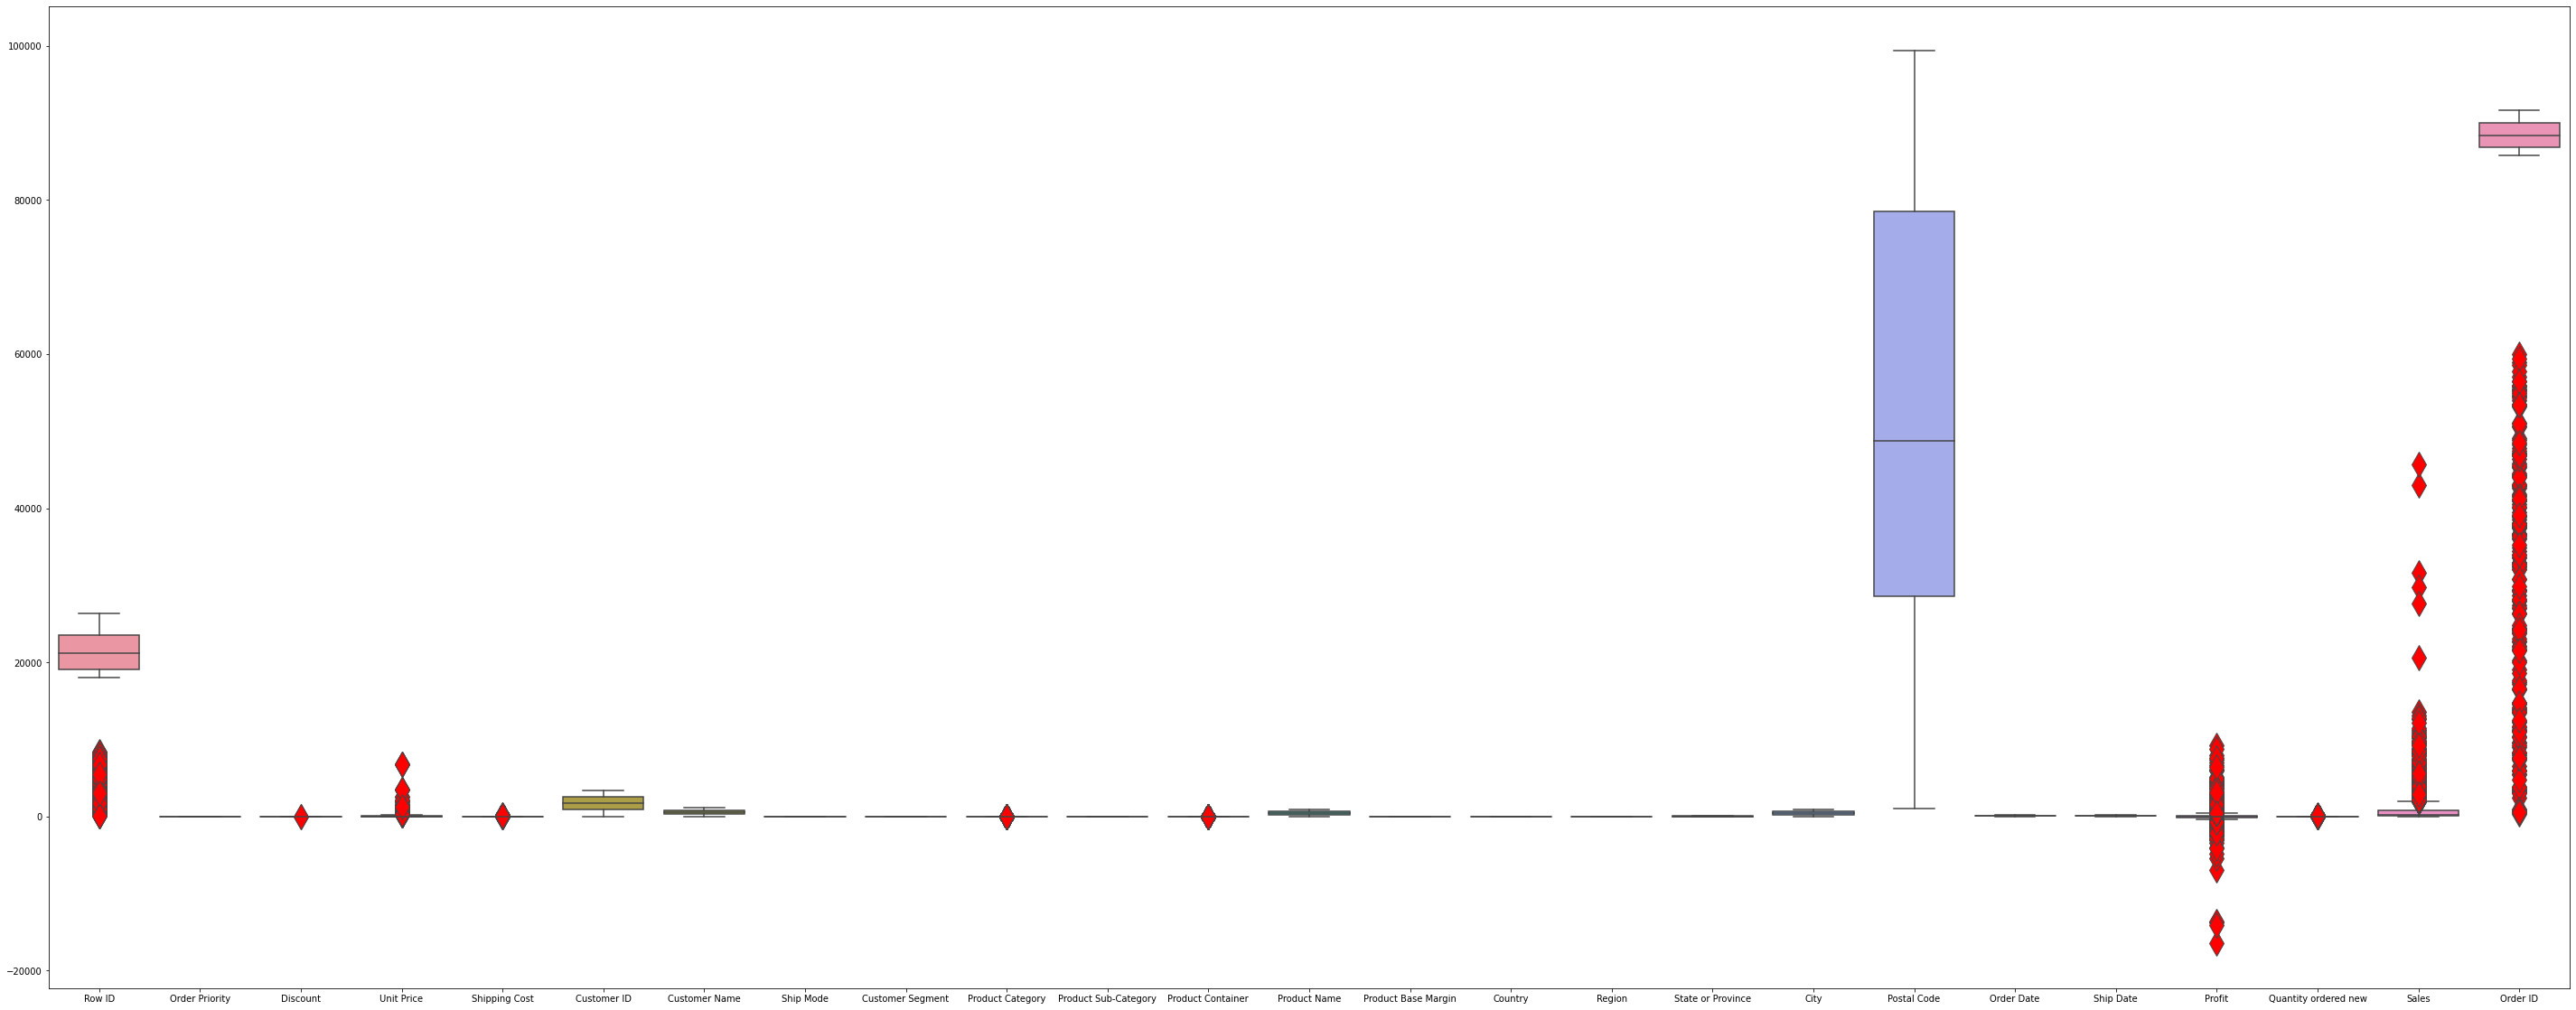

In [6]:
# 4. Deteksi outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50,20))
flierprops = dict(markerfacecolor='red', markersize=20)
sns.boxplot(data=dataset, flierprops=flierprops)

In [7]:
# 5. Sesuaikan satuan/skala pada tiap-tiap attribut atau normalisasi
from sklearn.preprocessing import Normalizer
dataset.describe()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.0,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,2.797643,0.048975,109.079221,12.968151,1735.376537,565.461578,1.595287,1.428279,1.041496,8.258709,3.763320,452.115266,0.515186,0.0,1.417520,22.157275,428.353996,51505.914447,86.427254,87.994365,114.921226,12.944672,985.828832,82365.924180
std,5957.595627,1.721970,0.031378,393.481301,17.414631,991.078006,326.462337,0.723153,1.031030,0.670702,4.975303,1.611188,264.345088,0.136492,0.0,1.142964,14.558930,248.299269,29375.785090,51.933096,52.616671,1141.098512,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,0.000000,1.140000,0.490000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,0.0,0.000000,0.000000,0.000000,1001.000000,0.000000,0.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,2.000000,0.020000,6.480000,3.230000,875.000000,285.000000,1.000000,1.000000,1.000000,4.000000,4.000000,216.000000,0.380000,0.0,0.000000,8.000000,201.000000,28520.750000,41.000000,42.000000,-83.921900,5.000000,58.807500,86767.750000
50%,21164.500000,3.000000,0.050000,20.990000,6.150000,1738.000000,564.500000,2.000000,1.000000,1.000000,9.000000,4.000000,450.500000,0.520000,0.0,1.000000,20.000000,436.000000,48708.000000,85.500000,86.000000,1.648450,10.000000,202.395000,88376.000000
75%,23483.250000,4.000000,0.080000,100.972500,14.362500,2578.250000,842.000000,2.000000,2.000000,1.000000,11.000000,5.000000,679.000000,0.590000,0.0,2.000000,35.000000,642.000000,78550.000000,133.000000,134.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,5.000000,0.210000,6783.020000,164.730000,3403.000000,1129.000000,2.000000,3.000000,2.000000,16.000000,6.000000,912.000000,0.850000,0.0,3.000000,48.000000,869.000000,99362.000000,178.000000,186.000000,9228.225600,167.000000,45737.330000,91586.000000


In [8]:
dataset = pd.DataFrame(Normalizer().fit_transform(dataset), columns=dataset.columns)
dataset.describe()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1.952000e+03,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.0,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.191361,0.000031,5.502569e-07,0.001141,0.000144,0.018845,0.006201,0.000018,0.000016,0.000012,0.000089,0.000042,0.004973,0.000006,0.0,0.000015,0.000247,0.004630,0.480313,0.000981,0.000999,0.001313,0.000184,0.013247,0.804052
std,0.052155,0.000042,8.988048e-07,0.003897,0.000251,0.018251,0.006571,0.000021,0.000018,0.000016,0.000084,0.000045,0.005262,0.000005,0.0,0.000014,0.000268,0.004295,0.231207,0.001603,0.001627,0.012806,0.000535,0.049825,0.162290
min,0.000709,0.000000,0.000000e+00,0.000010,0.000004,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.0,0.000000,0.000000,0.000000,0.010724,0.000000,0.000000,-0.175927,0.000007,0.000017,0.003977
25%,0.168291,0.000017,2.150319e-07,0.000065,0.000032,0.007938,0.002624,0.000011,0.000008,0.000008,0.000038,0.000030,0.002094,0.000004,0.0,0.000000,0.000085,0.001996,0.313749,0.000390,0.000402,-0.000811,0.000045,0.000554,0.724163
50%,0.199390,0.000029,4.735434e-07,0.000226,0.000060,0.017624,0.005527,0.000018,0.000011,0.000010,0.000083,0.000039,0.004457,0.000005,0.0,0.000017,0.000203,0.004162,0.496100,0.000837,0.000846,0.000015,0.000090,0.002048,0.841351
75%,0.225996,0.000041,7.346727e-07,0.000976,0.000154,0.025500,0.008180,0.000021,0.000022,0.000016,0.000118,0.000046,0.006575,0.000006,0.0,0.000022,0.000337,0.006106,0.665016,0.001263,0.001284,0.001178,0.000150,0.008369,0.919574
max,0.286477,0.000987,2.359107e-05,0.073896,0.005252,0.326609,0.111834,0.000493,0.000263,0.000472,0.001457,0.000987,0.084933,0.000160,0.0,0.000247,0.004686,0.046128,0.999764,0.041931,0.042424,0.181025,0.015334,0.930655,0.989281
